# Web Phishing Detection

## Data Pre-processing

### 1) Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='y2zkBzQGMh6LQgi2WqnSRfWNpR19L1YrSby3DOwyG6tL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'webphishingdetection-donotdelete-pr-cnal5acm4x6dpx'
object_key = 'dataset.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


### 2) Reading the dataset

In [3]:
#Splitting data as independent and dependent
#removing index column in independent dataset
x=data.iloc[:,1:31].values
y=data.iloc[:,-1].values
print(x,y)

[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]] [-1 -1 -1 ... -1 -1 -1]


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
data.shape

(11055, 32)

In [6]:
data.size

353760

### 3) Handling null values

In [7]:
#Analysing the data using pandas and checking if the dataset contains any null values.
data.info()
data.isnull().any() #no nullvalues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

In [8]:
data.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [10]:
x=data.iloc[:,1:31].values
y=data.iloc[:,-1].values
print(x)
print(y)

[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]]
[-1 -1 -1 ... -1 -1 -1]


### 4) Splitting the data

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

## Model Building

In [13]:
from sklearn.metrics import accuracy_score, classification_report

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
prediction_dt = dt.predict(x_test)

accuracy_dt = accuracy_score(y_test,prediction_dt)*100
scores_dict = {}

In [16]:
print('Accuracy score : ',accuracy_dt)
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(classification_report(y_test,prediction_dt))

Accuracy score :  96.29127091813659
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1014
           1       0.96      0.97      0.97      1197

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [17]:
dt.feature_importances_

array([8.05411631e-03, 8.85073783e-03, 2.28704120e-03, 2.70751481e-03,
       2.42384079e-03, 1.88501823e-02, 3.09889106e-02, 6.26711223e-01,
       1.56222606e-02, 5.12717869e-03, 4.78207299e-04, 4.76535961e-03,
       1.10986530e-02, 1.08036497e-01, 3.31926839e-02, 9.16803104e-03,
       7.58076619e-03, 1.96248613e-03, 5.13543924e-03, 2.04160815e-03,
       1.58805013e-03, 1.73704511e-03, 2.30487948e-03, 1.43576560e-02,
       7.67647690e-03, 2.81593664e-02, 5.68889854e-03, 9.80258479e-03,
       2.01379482e-02, 3.46435750e-03])

In [18]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [19]:
y_pred1=regressor.predict(x_test)
from sklearn.metrics import accuracy_score
RandomForestRegressor=accuracy_score(y_test,y_pred1.round())*100
RandomForestRegressor 

92.67299864314789

In [20]:
scores_dict['RandomForestRegressor'] = RandomForestRegressor

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred1=lr.predict(x_test)
from sklearn.metrics import accuracy_score
log_reg=accuracy_score(y_test,y_pred1)*100
log_reg

91.67797376752601

In [23]:
scores_dict['LogisticRegression'] = log_reg

In [24]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [25]:
y_pred= classifier.predict(x_test) 
y_pred1= classifier.predict(x_test) 

In [26]:
from sklearn.metrics import accuracy_score

classifier_acc=accuracy_score(y_test,y_pred1.round())*100
classifier_acc

96.92446856625962

In [27]:
scores_dict['RandomForestClassifier'] = classifier_acc

### 1) Choosing appropriate model

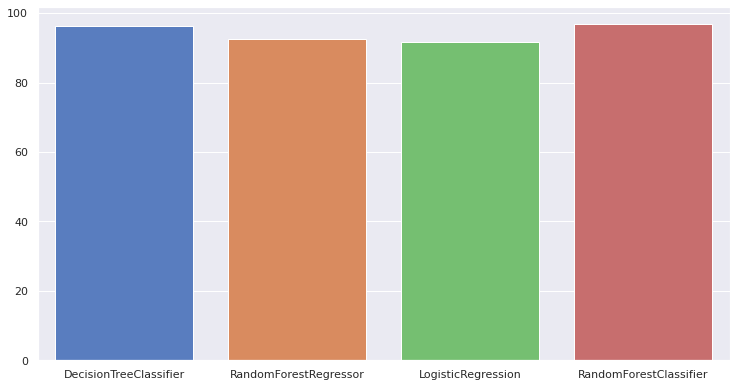

In [28]:
algo_name = list(scores_dict.keys())
accuracy_list = list(scores_dict.values())


sns.set(rc={'figure.figsize':(12.4,6.5)})
with sns.color_palette('muted'):
    sns.barplot(x=algo_name,y=accuracy_list)

## Saving the trained model

In [29]:
import pickle 
pickle.dump(dt, open('Phishing_Website.pkl','wb'))

## Deployment

In [30]:
! pip install -U ibm-watson-machine-learning

In [31]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [32]:
wml_credentials = {
    "apikey": "ouvZV8XvE5LPbgMrp55ollbnqU6K5e5RwnUsPKFsLrRU",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [33]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------------  ------------------------
ID                                    NAME                     CREATED
23db6681-888c-4ee2-9d3a-a63d5cdf886b  Web_phishing_deployment  2022-11-15T13:50:54.231Z
------------------------------------  -----------------------  ------------------------


In [34]:
space_id = "23db6681-888c-4ee2-9d3a-a63d5cdf886b"

In [35]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [36]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [37]:
model_name = "wpd_ads_model"
deployment_name = "wpd_deploy_model"
model_deploy = dt

In [38]:
software_spec_uid = wml_client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")

In [39]:
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [40]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME : model_name,
    wml_client.repository.ModelMetaNames.TYPE : "scikit-learn_1.0",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
}

In [41]:
model_details = wml_client.repository.store_model(
    model = model_deploy,
    meta_props = model_props,
    )

In [42]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-15T16:18:51.457Z',
  'id': 'd7b0b2c1-dfd6-420b-8354-118ede086ce3',
  'modified_at': '2022-11-15T16:18:58.258Z',
  'name': 'wpd_ads_model',
  'owner': 'IBMid-666002NROC',
  'resource_key': 'c1fc18fe-0370-49cd-8462-1f1286fd705b',
  'space_id': '23db6681-888c-4ee2-9d3a-a63d5cdf886b'},
 'system': {'warnings': []}}